In [100]:
import acquire
import pandas as pd
import seaborn as sns
from matplotlib import style
style.use('ggplot')

**1. Attendance Data**


In [63]:
attendance = acquire.get_attendance_data()
attendance.columns = ['name', 'day1','day2','day3','day4','day5','day6','day7', 'day8']
attendance = attendance.replace(['A','P','T','H'],[0,1,0.9,0.5])
attendance = attendance.set_index('name')
attendance['grade'] = attendance.mean(axis=1)
attendance


Reading from csv...


,day1,day2,day3,day4,day5,day6,day7,day8,grade
name,,,,,,,,,
Sally,1,0.9,0.9,0.5,1.0,0.0,0.9,0.9,0.7625
Jane,0,1.0,0.9,0.9,0.9,0.9,0.0,0.9,0.6875
Billy,0,0.9,0.0,0.0,0.5,0.9,1.0,0.9,0.5250
John,1,0.9,0.5,1.0,1.0,0.9,1.0,1.0,0.9125



Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:

name

Billy    0.5250

Jane     0.6875

John     0.9125

Sally    0.7625

Name: grade, dtype: float64


In [64]:
attendance['grade']

name
Sally    0.7625
Jane     0.6875
Billy    0.5250
John     0.9125
Name: grade, dtype: float64

**2. Coffee Levels**



a. Read the coffee_levels table.


In [66]:
coffee_levels=acquire.get_coffee_levels_data()
coffee_levels.head(3)

Reading from csv...


,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279


b. Transform the data so that each carafe is in it's own column.


In [74]:
tidy_coffee = coffee_levels.set_index(['hour','coffee_carafe']).unstack(level=1)
tidy_coffee.columns = tidy_coffee.columns.droplevel()
tidy_coffee.columns.name = ''
tidy_coffee.columns = ['carrafe x', 'carrafe y', 'carrafe z']
tidy_coffee

,carrafe x,carrafe y,carrafe z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [92]:
tidy_coffee = coffee_levels.pivot_table(index = ['hour'], 
columns= 'coffee_carafe', 
values ='coffee_amount').reset_index()
tidy_coffee = tidy_coffee.set_index('hour', drop = True)
tidy_coffee

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


c. Is this the best shape for the data?


Text(0, 0.5, 'coffee level')

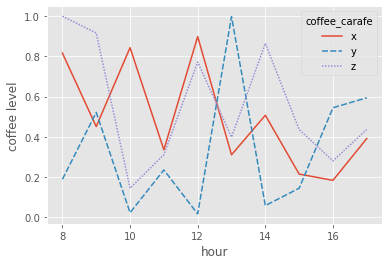

In [103]:
plot = sns.lineplot(data =tidy_coffee)
plot.set_ylabel('coffee level')

**3. Cake Recipes**



a. Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.


In [147]:
cake_recipes = acquire.get_cake_recipes_data()
cake_recipes.head()

Reading from csv...


,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


b. Tidy the data as necessary.


In [148]:
tidy_cakes = cake_recipes
tidy_cakes[['recipe', 'postiion']] = tidy_cakes['recipe:position'].str.split(':', expand = True)
tidy_cakes.drop(columns= 'recipe:position', inplace= True)
tidy_cakes.head()


,225,250,275,300,recipe,postiion
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom


c. Which recipe, on average, is the best? recipe b


In [151]:
#tidy_cakes['average'] = tidy_cakes.recipe.mean().mean()
by_recipe = tidy_cakes.groupby('recipe').mean()
by_recipe['average'] = by_recipe.mean(axis=1)
by_recipe

,225,250,275,300,average
recipe,,,,,
a,56.724203,52.961181,71.495794,74.507627,63.922201
b,69.775162,78.564260,79.895930,78.708945,76.736074
c,83.888258,67.398417,92.495638,59.716678,75.874748
d,74.836465,67.385891,55.659653,53.577368,62.864844


d. Which oven temperature, on average, produces the best results? 275


In [ ]:
average = {'recipe: average', '225': by_recipe['225'].mean(), '250' : by_recipe['250'].mean(), '275': by_recipe['275'].mean(), '300':by_recipe['300'].mean(), 'average' : by_recipe['average'].mean()}

In [152]:
by_recipe['300'].mean()

66.6276545500679

e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees


**Bonus**: explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.